## Preprocessing

In [1]:
#imports
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Configure matplotlib 
%matplotlib inline

#loading in the air quality dataset
df = pd.read_csv("AQI_Respiratory_2000_2019.csv")

#drop unneeded columns
df = df.drop(columns=["FIPS,YEAR", "fips"], errors="ignore")

#cleaning dataset
df= df.dropna()

# Define the target
target = "Resp Death Rate"

#scaling features
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
# Keep only the numeric columns that are predictors (exclude the target)
feature_cols = [col for col in numeric_cols if col != target]

# Scale the feature columns so they are on the same range
scaler = StandardScaler()
df[feature_cols] = scaler.fit_transform(df[feature_cols])


#checking the cleaned up dataset
print(df.head())
print(df.columns)

               location_name      year  Resp Death Rate  Days with AQI  \
0   Madison County (Alabama) -1.619519         0.000219       0.752921   
1   Colbert County (Alabama) -1.619519         0.000354      -1.829484   
2    DeKalb County (Alabama) -1.619519         0.000317       0.633733   
3  Lawrence County (Alabama) -1.619519         0.000314      -0.180718   
4    Morgan County (Alabama) -1.619519         0.000320      -0.677334   

   Good Days  Moderate Days  Unhealthy for Sensitive Groups Days  \
0  -0.117021       0.833387                             1.912356   
1  -1.918017      -0.085113                            -0.428171   
2  -0.318375       0.550771                             4.252883   
3  -0.754641       0.395333                             1.828765   
4  -1.347515       0.183371                             2.831849   

   Unhealthy Days  Very Unhealthy Days  Hazardous Days   Max AQI  \
0        0.907525            -0.134978       -0.054315  0.148693   
1       -0

/var/folders/nc/v0jnr_bj5cjc3nf5q0rn659c0000gn/T/ipykernel_15376/368364861.py:15: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("AQI_Respiratory_2000_2019.csv")


## Model: Linear Regression

### Single-Variable Regression

In [2]:
# Define predictor variables
predictors = ["Days Ozone", "Days PM2_5", "Days PM10", "Days CO", "Days NO2", "Max AQI", "Median AQI"]

print("=" * 57)
print("Single-Variable Regression Analysis")
print("=" * 57)

# Store results for comparison
single_results = []

# Test each predictor individually
for predictor in predictors:
    if predictor not in df.columns:
        continue
    
    # Prepare data for single-variable regression
    X = df[[predictor]]
    y = df[target]
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    single_results.append([predictor, mae, rmse, r2])
    print(f"{predictor:25}: R^2 = {r2:6.4f}, Root Mean Square Error (RMSE) = {rmse:6.4f}")

Single-Variable Regression Analysis
Days Ozone               : R^2 = 0.0018, Root Mean Square Error (RMSE) = 0.0001
Days PM2_5               : R^2 = 0.0148, Root Mean Square Error (RMSE) = 0.0001
Days PM10                : R^2 = 0.0000, Root Mean Square Error (RMSE) = 0.0001
Days CO                  : R^2 = -0.0005, Root Mean Square Error (RMSE) = 0.0001
Days NO2                 : R^2 = 0.0012, Root Mean Square Error (RMSE) = 0.0001
Max AQI                  : R^2 = 0.0009, Root Mean Square Error (RMSE) = 0.0001
Median AQI               : R^2 = 0.0002, Root Mean Square Error (RMSE) = 0.0001


### Multivariable regresssion

In [3]:
print("\n" + "=" * 50)
print("Multivariable Regression Analysis")
print("=" * 50)
# Combine all available predictors for multivariable regression
available_predictors = [p for p in predictors if p in df.columns]
X_multi = df[available_predictors]
y_multi = df[target]

# Split data for multivariable model
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

# Train multivariable regression model
multi_model = LinearRegression()
multi_model.fit(X_train, y_train)
y_pred_multi = multi_model.predict(X_test)

# Calculate performance metrics for multivariable model
mae_multi = mean_absolute_error(y_test, y_pred_multi)
rmse_multi = np.sqrt(mean_squared_error(y_test, y_pred_multi))
r2_multi = r2_score(y_test, y_pred_multi)

print(f"Mean Absolute Error (MAE): {mae_multi:.4f}")
print(f"Root Mean Square Error (RMSE): {rmse_multi:.4f}")
print(f"R-squared (R^2): {r2_multi:.4f}")




Multivariable Regression Analysis
Mean Absolute Error (MAE): 0.0001
Root Mean Square Error (RMSE): 0.0001
R-squared (R^2): 0.0457


In [4]:
# Analyze feature importance based on regression coefficients
print("\n" + "=" * 40)
print("Feature Importance (Coefficients)")
print("=" * 40)
# DataFrame with predictors and their coefficients
coef_df = pd.DataFrame({
    'Predictor': available_predictors,
    'Coefficient': multi_model.coef_
})
# Add absolute values to sort predictors by impact
coef_df['Abs_Coefficient'] = abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values('Abs_Coefficient', ascending=False)

# Display coefficients in order of strongest to weakest
for _, row in coef_df.iterrows():
    print(f"{row['Predictor']:25}: {row['Coefficient']:8.4f}")


Feature Importance (Coefficients)
Days PM2_5               :  -0.0000
Days Ozone               :  -0.0000
Days PM10                :  -0.0000
Days NO2                 :  -0.0000
Days CO                  :  -0.0000
Max AQI                  :  -0.0000
Median AQI               :   0.0000


## Visualizations

### Plot 1 - R^2 Comparison with Bar Chart

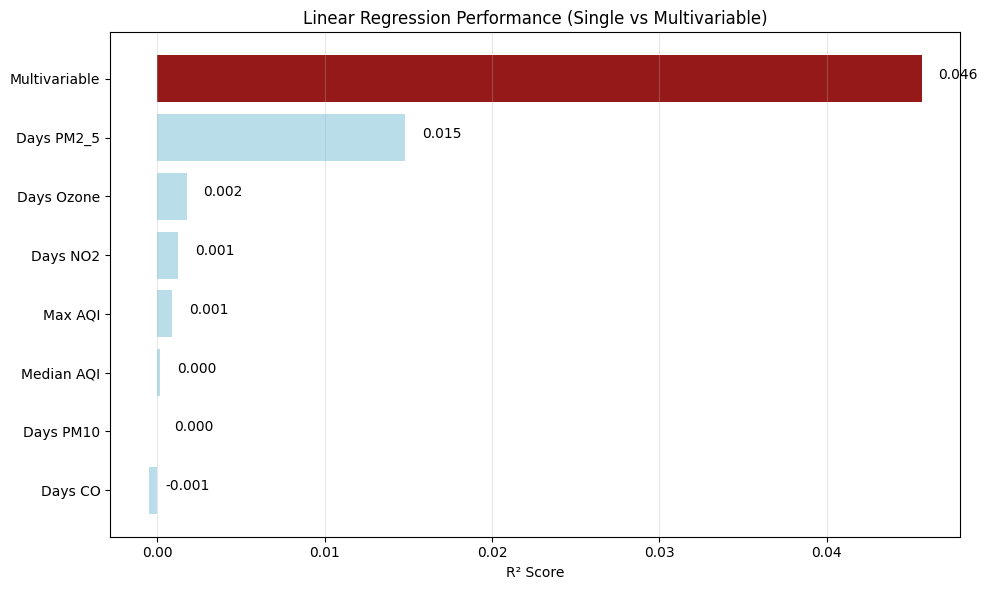

In [5]:
# Plot 1: R^2 Comparison
# Shows how each pollutant model performs and compares it to the multivariable model.

# Create a DataFrame of results and sort by R^2
results_df = pd.DataFrame(single_results, columns=['Predictor', 'MAE', 'RMSE', 'R2'])
results_df = results_df.sort_values('R2', ascending=True)

plt.figure(figsize=(10, 6))
# Plot R^2 values for single-variable models
bars = plt.barh(results_df['Predictor'], results_df['R2'], color='lightblue', alpha=0.85)

# Add a bar for the multivariable model
plt.barh('Multivariable', r2_multi, color='darkred', alpha=0.9)

# Add R^2 labels to each bar
for bar, r2 in zip(bars, results_df['R2']):
    plt.text(r2 + 0.001, bar.get_y() + bar.get_height()/2, f'{r2:.3f}')

# Label for multivariable R^2
plt.text(r2_multi + 0.001, len(results_df), f'{r2_multi:.3f}')

plt.xlabel('R² Score')
plt.title('Linear Regression Performance (Single vs Multivariable)')
plt.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()


### Plot 2 - Best Predictor Scatterplot

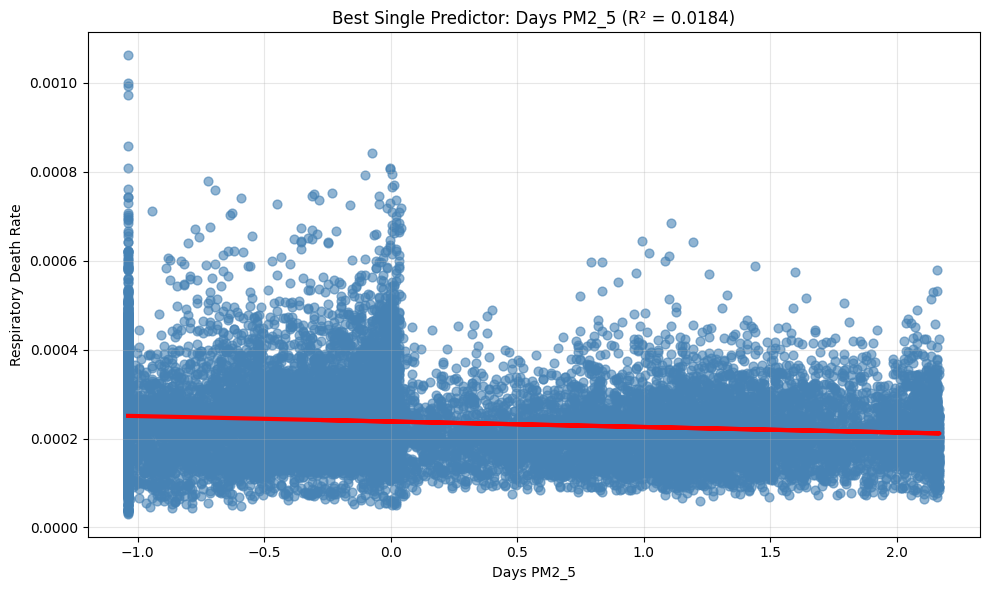

In [6]:
# Plot 2: Best Predictor Scatter 
# Shows the strongest pollutant predictor and its linear relationship with death rates.

# Get the predictor with the strongest R^2 score
best_predictor = max(single_results, key=lambda x: x[3])[0]

# Set up X and y for this predictor
X_best = df[[best_predictor]]
y_best = df[target]

# Fit a simple linear regression model
model_best = LinearRegression()
model_best.fit(X_best, y_best)
y_pred_best = model_best.predict(X_best)

# Calculate R^2 using the full dataset
r2_best = r2_score(y_best, y_pred_best)

 # Creating the scatter plot and regression line
plt.figure(figsize=(10, 6))

plt.scatter(X_best, y_best, alpha=0.6, s=40, color='steelblue')
plt.plot(X_best, y_pred_best, color='red', linewidth=3)

plt.xlabel(best_predictor)
plt.ylabel('Respiratory Death Rate')
plt.title(f'Best Single Predictor: {best_predictor} (R² = {r2_best:.4f})')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### Summary 

In [7]:
# Summary Findings: key results for the evaluation and conclusion section
print("Linear Regression Results")
print("="*60)
# Strongest single predictor
print(f"Best single predictor: {best_predictor} (R^2 = {r2_best:.4f})")
# Print overall multivariable model performance
print(f"Multivariable model: R^2 = {r2_multi:.4f}, MAE = {mae_multi:.4f}, RMSE = {rmse_multi:.4f}")
# Show how much combining predictors improves R^2
print(f"Improvement from combining pollutants: {r2_multi - r2_best:.4f}")
# Conclusion
print("\nConclusion: Answers question - 'Which pollutants have the most significant impact on health outcomes?'")
print(f"Answer: {best_predictor} is the best single predictor of respiratory death rates")

Linear Regression Results
Best single predictor: Days PM2_5 (R^2 = 0.0184)
Multivariable model: R^2 = 0.0457, MAE = 0.0001, RMSE = 0.0001
Improvement from combining pollutants: 0.0273

Conclusion: Answers question - 'Which pollutants have the most significant impact on health outcomes?'
Answer: Days PM2_5 is the best single predictor of respiratory death rates


### Key Findings

1. Individual Air Quality Metrics Have Minimal Predictive Power

    * PM2.5 emerged as the strongest single predictor but only explains 1.48% of respiratory death rate variation (R^2 = 0.0148)

    * All other individual pollutants performed even worse, with R^2 values ranging from -0.0005 to 0.0018

    * RMSE values are consistently low (0.0001) across all single-variable models, indicating similar prediction accuracy

2. Multivariable Model Shows Modest Improvement

    * Combined air quality metrics achieve R^2 = 0.0457, explaining 4.57% of variation

    * This represents approximately a 3x improvement over the best single-variable model

    * MAE and RMSE remain at 0.0001, showing consistent prediction precision

3. Limited Overall Predictive Capability

    * Even the comprehensive multivariable model explains less than 5% of respiratory death rate variation

    * The low R^2 values suggest that measured air quality metrics alone are insufficient predictors

    * Results indicate respiratory mortality is influenced by factors beyond the air quality variables examined